In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [47]:
df=pd.read_csv('solar_system.csv')
print(df)
print(df.shape)

                      Attribute Mercury    Venus  Earth   Moon   Mars  \
0                Mass (10^24kg)   0.330     4.87   5.97  0.073  0.642   
1                 Diameter (km)    4879    12104  12756   3475   6792   
2              Density (kg/m^3)    5429     5243   5514   3340   3934   
3               Gravity (m/s^2)     3.7      8.9    9.8    1.6    3.7   
4        Escape Velocity (km/s)     4.3     10.4   11.2    2.4    5.0   
5       Rotation Period (hours)  1407.6  -5832.5   23.9  655.7   24.6   
6         Length of Day (hours)  4222.6   2802.0   24.0  708.7   24.7   
7   Distance from Sun (10^6 km)    57.9    108.2  149.6  0.384  228.0   
8          Perihelion (10^6 km)    46.0    107.5  147.1  0.363  206.7   
9            Aphelion (10^6 km)    69.8    108.9  152.1  0.406  249.3   
10        Orbital Period (days)    88.0    224.7  365.2   27.3  687.0   
11      Orbital Velocity (km/s)    47.4     35.0   29.8    1.0   24.1   
12    Orbital Inclination (deg)     7.0      3.4   

In [48]:
#Inspect the data

#the shape is 20x11
# there are 20 rows and 11 columns

In [49]:
#print hte first 5 rows
df.head()

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3


In [50]:
df.tail()

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
15,Mean Temperature (C),167,464,15,-20,-65,-110,-140,-195,-200,-225
16,Surface Pressure (bars),0,92,1,0,0.01,Unknown,Unknown,Unknown,Unknown,0.00001
17,Number of Moons,0,0,1,0,2,95,274,28,16,5
18,Ring System?,No,No,No,No,No,Yes,Yes,Yes,Yes,No
19,Global Magnetic Field?,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Unknown


In [17]:
print(df.columns)

Index(['Attribute', 'Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')


In [68]:
print(df.index.tolist())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [72]:
#5. Extract the following rows as variables:
orbital_period = df.iloc[10, 1:].astype(float)
perihelion= df.iloc[8, 1:].astype(float)
aphelion = df.iloc[9, 1:].astype(float)
print(orbital_period)
print(perihelion)
print(aphelion)

Mercury       88.0
Venus        224.7
Earth        365.2
Moon          27.3
Mars         687.0
Jupiter     4331.0
Saturn     10747.0
Uranus     30589.0
Neptune    59800.0
Pluto      90560.0
Name: 10, dtype: float64
Mercury      46.000
Venus       107.500
Earth       147.100
Moon          0.363
Mars        206.700
Jupiter     740.600
Saturn     1357.600
Uranus     2732.700
Neptune    4471.100
Pluto      4436.800
Name: 8, dtype: float64
Mercury      69.800
Venus       108.900
Earth       152.100
Moon          0.406
Mars        249.300
Jupiter     816.400
Saturn     1506.500
Uranus     3001.400
Neptune    4558.900
Pluto      7375.900
Name: 9, dtype: float64


In [73]:
# Perihelion: the closest distance between the sun and something orbiting it
# Aphelion: the farthest distance between the sun and something orbiting it
# semi-major axis: half the diameter of an elliptical orbit

In [75]:
#7. Compute the semi-major axis:
semi_major_axis = (perihelion + aphelion) / 2
print(semi_major_axis)

Mercury      57.9000
Venus       108.2000
Earth       149.6000
Moon          0.3845
Mars        228.0000
Jupiter     778.5000
Saturn     1432.0500
Uranus     2867.0500
Neptune    4515.0000
Pluto      5906.3500
dtype: float64


In [77]:
sma_row = pd.Series(
    ["Semi-major axis (AU)"] + semi_major_axis.tolist(),
    index=df.columns
)

df = pd.concat([df, sma_row.to_frame().T])
df

,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3
5,Rotation Period (hours),1407.6,-5832.5,23.9,655.7,24.6,9.9,10.7,-17.2,16.1,-153.3
6,Length of Day (hours),4222.6,2802.0,24.0,708.7,24.7,9.9,10.7,17.2,16.1,153.3
7,Distance from Sun (10^6 km),57.9,108.2,149.6,0.384,228.0,778.5,1432.0,2867.0,4515.0,5906.4
8,Perihelion (10^6 km),46.0,107.5,147.1,0.363,206.7,740.6,1357.6,2732.7,4471.1,4436.8
9,Aphelion (10^6 km),69.8,108.9,152.1,0.406,249.3,816.4,1506.5,3001.4,4558.9,7375.9


In [79]:
df.shape
#22 rows and 11 columns

(22, 11)

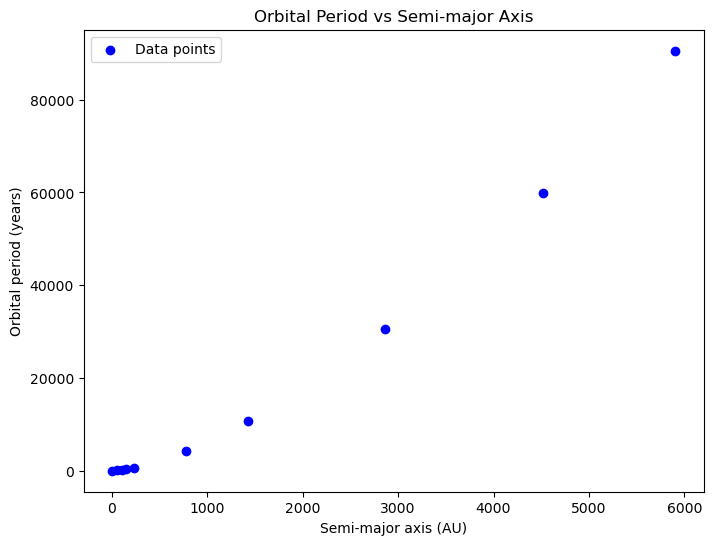

In [90]:
#Plot the semi major axis vs. orbital period using plt.scatter(). 
plt.figure(figsize=(8,6))
plt.scatter(x=semi_major_axis, y=orbital_period, color='blue', label='Data points')

plt.xlabel("Semi-major axis (AU)")
plt.ylabel("Orbital period (years)")
plt.title("Orbital Period vs Semi-major Axis")
plt.legend()
plt.show()

In [110]:
#define the model function:
def keplers_third_law(a, m):
    return m * a**1.5

#fit the model to the data
# params, covariance = curve_fit(keplers_third_law, semi_major_axis, orbital_period)
# m_best = params[0]
# m_best
popt, pcov = curve_fit(keplers_third_law, semi_major_axis, orbital_period)
print(popt, pcov)

[0.19879982] [[1.26976143e-07]]


In [111]:
#12. Print best-fit parameter
m_fit = popt[0]
print("Best-fit parameter m:", m_fit)

Best-fit parameter m: 0.19879981918623565


In [115]:
print(f"Fitted model: T = {m_fit:.2f} * a^(3/2)")

Fitted model: T = 0.20 * a^(3/2)


In [112]:
residuals = y-keplers_third_law(semi_major_axis, m_best)
chi2 = np.sum(residuals**2)
dof = len(orbital_period) - 1 
chi2_reduced = chi2 / dof
print(f"Reduced chi-squared: {chi2_reduced:.2f}")

Reduced chi-squared: 41276.71


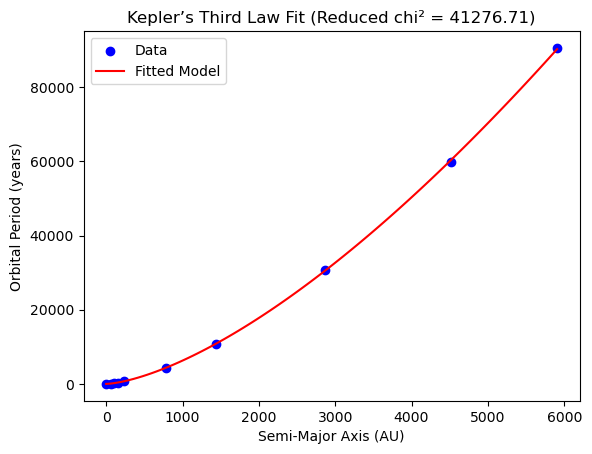

In [117]:
plt.scatter(semi_major_axis, orbital_period, color='blue', label='Data')
a_fit = np.linspace(min(semi_major_axis), max(semi_major_axis), 100)
plt.plot(a_fit, keplers_third_law(a_fit, m_fit), color='red', label='Fitted Model')
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Orbital Period (years)')
plt.title(f"Kepler’s Third Law Fit (Reduced chi² = {chi2_reduced:.2f})")
plt.legend()
plt.show()

In [118]:
df.to_csv("kepler.csv", index=False)